# Neural Nets

According to the Father of AI, Prof. John McCarthy, *artificial intelligence* "is the science of engineering and making intelligent machines, especially intelligent computer programs. It is related to the similar task of using computers to understand human intelligence, but AI does not have to confine itself to methods that are biologically observable."
src: http://jmc.stanford.edu/artificial-intelligence/what-is-ai/index.html  

Machine learning is a subset of artificial intelligence. *Machine Learning* is the study of computer algorithms that improve automatically through experience.  
src: *Machine Learning* by Tom Mitchell of CMU.  

A neural network is a machine learning model. A *neural network* is a two-stage regression or classification model, typically represented by a network diagram as seen below. This network applies both to regression or classification. 
![Fig 11.2](assets/fig112.png)

Neural networks were inspired by the human brain, hence the term "neural network". Each unit represents a neuron, and the connnections ( links in Figure 11.2) represent synapes. In early models, the neurons fired when the total signal passed to that unit exceeded a certain threshold.

The term *neural network* has evolved to encompass a large class of models and learning methods. Those most widely used "vanilla" neural net is *the single hidden layer back-propagation network* also called *single layer perceptron*.  

A *perceptron* is a clasifier that computes a linear combination of the input features and returns the sign. We tweak the perceptron using the *perceptron learning algorithm* which tries to find a separating hyperplane by minimizing the distance of misclassified points to the decision boundary.
![fig415](assets/fig415.png)

### So what does that definition of *perceptron* mean?
The perceptron, is a *score fn* which maps raw data to class scores (target variable). We will measure the success of the score fn with a *loss fn*.  

#### Score Function

Maps input vectors to class scores

$$f: \mathbb{R}^D \mapsto \mathbb{R}$$

where $D$ is the dimension of our input vector. 

Then 

$$   f({x}_i, {\beta}, b) = \left\{
     \begin{array}{lr}
       1 & : {\beta}\cdot{x}_i \geq b\\
       0 & : {\beta}\cdot{x}_i < b
     \end{array}
   \right.
$$

#### Loss Function
Note that of the inputs to the score function, we do not have control over the $x_i$. Instead, we must change the $\beta_i$ values to match a given set of $y_i$. To do this, we will define a loss function that measures our performance. We will use 

$$L_i(\beta)=\rvert f_i - y_i\rvert$$

Our problem is a binary classification and therefore, $$y_i \in \{0,1\}$$

#### We will be seeking to minimize loss

def: The *dot product* $\vec{x} \cdot \vec{y}$ of two vectors $\vec{x}, \vec{y} \in  \mathbb{R}^{n} is$  
    $\vec{x} \cdot \vec{y} = $ 
    $\left[ \begin{array}{c} 
            x_{1} \\
            x_{2} \\ 
            \vdots \\
            x_{n}
            \end{array} \right] $
    $ \cdot $
        $\left[ \begin{array}{c} 
            y_{1} \\
            y_{2} \\ 
            \vdots \\
            y_{n}
            \end{array} \right] $
    $ = x_{1}y_{1} + x_{2}y_{2} + ... + x_{n}y_{n} $
    $ = x^{T}y $

#### Let's Look at a Super Simple Toy Example of a Perceptron 

The x's are inputs, features, and the y is the output, target variable. y can either be 0 or 1.  
Our toy example is only one sample. 

In [2]:
import numpy as np

In [3]:
betas = (-1, -4); threshold = 0.5
one_xs = np.array((-4,-3)); one_y = 0

The dot product is 16 => score = 0 = one_y => we did NOT correctly predicted y using this set of betas. 

In [6]:
dot_prod = one_xs.dot(betas)
# dot_prod = 16

## score fn
if dot_prod <= threshold:
    scr = 0
else:
    scr = 1
# scr = 0

loss = abs(scr - one_y)
# loss = 1
print(dot_prod, scr, loss, sep='\n')

16
1
1


Let's see how other betas do. What is that pattern?  
y = 1, therefore we want the score = 1 and dot prod > 0.5.  
We want our betas to be bigger because our set of xs are negative and neg x neg = positive.

In [7]:
print('one_xs = '); print(one_xs)
print('one_y = '); print(one_y)

losses = []
test_beta_1 = list(range(-5,5))
test_beta_2 = list(range(-5,5))
for beta_2 in test_beta_2:
    for beta_1 in test_beta_1:
        dot_prod = one_xs.dot(np.array((beta_1, beta_2)))

        print(one_xs, 'dot', (beta_1, beta_2), '=', dot_prod)
        
        if dot_prod <= threshold:
            scr = 0
        else:
            scr = 1
            
            
        this_loss = abs(scr - one_y)
        losses.append(this_loss)
losses = np.array(losses).reshape(10,10); losses
        
plt.pcolormesh(test_beta_1, test_beta_2, losses, cmap = 'Wistia')
plt.colorbar()
plt.xlabel('beta ONE'); plt.ylabel('beta TWO'); plt.title('loss_i = |score(beta_1, beta_2) - actualY|')
plt.plot(*betas, 'x') # plots an x at betas = (-2,3)

one_xs = 
[-4 -3]
one_y = 
0
[-4 -3] dot (-5, -5) = 35
[-4 -3] dot (-4, -5) = 31
[-4 -3] dot (-3, -5) = 27
[-4 -3] dot (-2, -5) = 23
[-4 -3] dot (-1, -5) = 19
[-4 -3] dot (0, -5) = 15
[-4 -3] dot (1, -5) = 11
[-4 -3] dot (2, -5) = 7
[-4 -3] dot (3, -5) = 3
[-4 -3] dot (4, -5) = -1
[-4 -3] dot (-5, -4) = 32
[-4 -3] dot (-4, -4) = 28
[-4 -3] dot (-3, -4) = 24
[-4 -3] dot (-2, -4) = 20
[-4 -3] dot (-1, -4) = 16
[-4 -3] dot (0, -4) = 12
[-4 -3] dot (1, -4) = 8
[-4 -3] dot (2, -4) = 4
[-4 -3] dot (3, -4) = 0
[-4 -3] dot (4, -4) = -4
[-4 -3] dot (-5, -3) = 29
[-4 -3] dot (-4, -3) = 25
[-4 -3] dot (-3, -3) = 21
[-4 -3] dot (-2, -3) = 17
[-4 -3] dot (-1, -3) = 13
[-4 -3] dot (0, -3) = 9
[-4 -3] dot (1, -3) = 5
[-4 -3] dot (2, -3) = 1
[-4 -3] dot (3, -3) = -3
[-4 -3] dot (4, -3) = -7
[-4 -3] dot (-5, -2) = 26
[-4 -3] dot (-4, -2) = 22
[-4 -3] dot (-3, -2) = 18
[-4 -3] dot (-2, -2) = 14
[-4 -3] dot (-1, -2) = 10
[-4 -3] dot (0, -2) = 6
[-4 -3] dot (1, -2) = 2
[-4 -3] dot (2, -2) = -2
[-4 -3] dot

NameError: name 'plt' is not defined

Now, we can tell that because of intuition. How would we systematically get optimal betas? How would we do it so that our way of doing is generalizable to all sets of xs?  

If there is a loss (recall loss = 0 or 1), then you need to change the betas.
If the set of x is negative, then you make the betas bigger. Because you are trying to make the betas the opposite sign of x or something like that... you know that you want to go in the direction of increasing the betas...

In [8]:
print('loss =', loss); print('one_xs = ', one_xs); print('betas = ', betas)
delta = loss * one_xs *0.1; print('delta = loss * one_xs * 0.1= ', delta)
new_betas = betas - delta; print('new_betas = betas - delta =', new_betas)

loss = 1
one_xs =  [-4 -3]
betas =  (-1, -4)
delta = loss * one_xs * 0.1=  [-0.4 -0.3]
new_betas = betas - delta = [-0.6 -3.7]


If you can understand how the Perceptron works on one sample, it is easy to see how it works on multiple samples and with more features (more than 2). It is just the same concept applied to more dimensions!

#### Let's Look at a How a Perceptron Works With Multiple Samples
In practice, we will not work with only one sample of course.

In [11]:
from numpy.linalg import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

In [9]:
x_1, y_1 = (-4, -3), 0 
x_2, y_2 = ( 2, -4), 0
x_3, y_3 = (-2, -1), 0
x_4, y_4 = ( 0,  0), 1
x_5, y_5 = ( 1,  1), 1
x_6, y_6 = (-4,  2), 1

ys = [y_1, y_2, y_3, y_4, y_5, y_6]
xs = [x_1, x_2, x_3, x_4, x_5, x_6]
# list comprehensn
x_1s = [x[0] for x in xs]
x_2s = [x[1] for x in xs]

**Lambda Expressions** are anonymous fns in Python. They are prettier.  

```
f = lambda x: 2/3*x + 1/6
```
is equivalent to
```
def f(x): 
    return (2/3*x + 1/6)
```

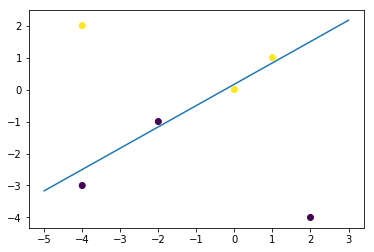

In [12]:
# note that the x1_s, x_2s and colors vectors must be the same size!
colors = ys
plt.scatter(x_1s, x_2s, c=colors)
xx = np.linspace(start = -5, stop = 3, num = 2)
f = lambda x: 2/3*x + 1/6
yy = f(xx)
plt.plot(xx, yy)

In [13]:
class Perceptron:
    
    def __init__(self, betas=None, b=None):
        self.betas = np.array(betas, dtype=float)
        self.b = b
            
    
    def score(self, inputs):
        inputs = np.array(inputs)
        if self.betas.dot(inputs) >= self.b:
            return 1
        else:
            return 0
        
    def dot_prod(self, inputs):
        return self.betas.dot(inputs)
        
    def loss_i(self, inputs, y):
        return self.score(inputs) - y
    
    def loss(self, input_set, y_set):
        return sum([abs(self.loss_i(x, y)) for x, y in zip(input_set, y_set)])
    
    def update(self, input_set, y_set, eta=0.1):
#         delta_i = Loss(x_i) * x_i
        deltas = np.array([self.loss_i(x, y)*np.array(x) 
                           for x, y in zip(input_set, y_set)], dtype=float)
        
        print('delta = '); print(deltas, '\n')
        print('self.betas = ', self.betas)
        print('self.betas - eta*delta =')
        
        for delta in deltas:
            # eqiv. to self.betas = self.betas - eta*delta
            self.betas -= eta*delta
            print('    ', self.betas)

In [14]:
betas = (-2,3)
threshhold = 0.5
ptron = Perceptron(betas, threshhold)

```ptron.score(x) = 
        1 if (x1*beta1 + x2*beta2) >= 0.5  
        0 if (x1*beta1 + x2*beta2) < 0.5
        ```

In [15]:
for x, y in zip(xs, ys):
    print(ptron.score(x), y, ptron.loss_i(x,y))

0 0 0
0 0 0
1 0 1
0 1 -1
1 1 0
1 1 0


In [16]:
print(ptron.loss(xs,ys))

2


### !!!
This is actual data. We cannot change it.  
### What can we change?
Let's change our weights and collect the scores.

In [17]:
losses = []
test_beta_1 = list(range(-5,5))
test_beta_2 = list(range(-5,5))
for beta_2 in test_beta_2:
    for beta_1 in test_beta_1:
        ptron = Perceptron((beta_1, beta_2), 0.5)
        losses.append(ptron.loss(xs,ys))

# note: before reshaping, losses is 100 x 1, a long vertical vector
losses = np.array(losses).reshape(10,10); losses

array([[5, 5, 5, 6, 6, 6, 6, 6, 5, 4],
       [5, 5, 5, 6, 6, 6, 6, 5, 4, 4],
       [5, 5, 5, 5, 6, 6, 6, 5, 4, 3],
       [4, 4, 5, 5, 6, 6, 5, 4, 3, 3],
       [4, 4, 4, 4, 5, 6, 4, 3, 3, 3],
       [4, 4, 4, 4, 4, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 1, 2, 2, 3, 3],
       [4, 4, 4, 4, 1, 1, 2, 2, 2, 2],
       [4, 4, 4, 2, 1, 1, 1, 2, 2, 2],
       [4, 4, 2, 1, 1, 1, 1, 2, 2, 2]])

### Let's make a heatmap and see what each line does

Text(0.5,1,'loss_i = |score(beta_1, beta_2) - actualY|')

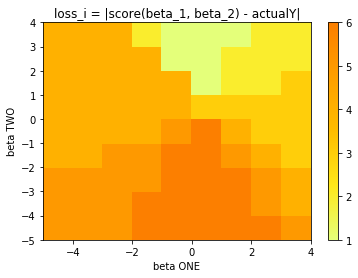

In [18]:
plt.pcolormesh(test_beta_1, test_beta_2, losses, cmap = 'Wistia')
plt.colorbar()
plt.xlabel('beta ONE'); plt.ylabel('beta TWO'); plt.title('loss_i = |score(beta_1, beta_2) - actualY|')

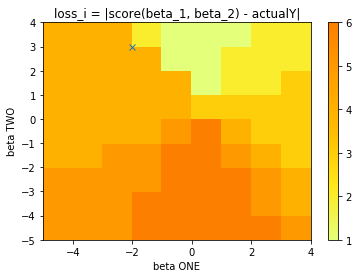

In [19]:
plt.pcolormesh(test_beta_1, test_beta_2, losses, cmap = 'Wistia')
plt.colorbar()
plt.xlabel('beta ONE'); plt.ylabel('beta TWO'); plt.title('loss_i = |score(beta_1, beta_2) - actualY|')
plt.plot(*betas, 'x') # plots an x at betas = (-2,3)

In [20]:
betas = (-1,-4); threshold = 0.5
ptron = Perceptron(betas, threshold)

In [21]:
print('betas =', betas); print('threshold =', threshold)

print('x', 'ptron.dot_prod(x)', 
      'ptron.score(x)', 'y', 
      'ptron.loss_i(x,y)', sep = '     ')

for x, y in zip(xs, ys):
    print(x, ptron.dot_prod(x), ptron.score(x), y, ptron.loss_i(x,y), sep='   ') 

betas = (-1, -4)
threshold = 0.5
x     ptron.dot_prod(x)     ptron.score(x)     y     ptron.loss_i(x,y)
(-4, -3)   16.0   1   0   1
(2, -4)   14.0   1   0   1
(-2, -1)   6.0   1   0   1
(0, 0)   0.0   0   1   -1
(1, 1)   -5.0   0   1   -1
(-4, 2)   -4.0   0   1   -1


In [22]:
ptron.update(xs, ys, eta = 0.01)

delta = 
[[-4. -3.]
 [ 2. -4.]
 [-2. -1.]
 [ 0.  0.]
 [-1. -1.]
 [ 4. -2.]] 

self.betas =  [-1. -4.]
self.betas - eta*delta =
     [-0.96 -3.97]
     [-0.98 -3.93]
     [-0.96 -3.92]
     [-0.96 -3.92]
     [-0.95 -3.91]
     [-0.99 -3.89]


In [23]:
ptron.betas

array([-0.99, -3.89])

In [24]:
betas = (-1,-4); threshold = 0.5
descending_betas = [np.array(betas)]
ptron = Perceptron(betas, threshold)
for i in range(350):
    ptron.update(xs,ys, 0.11)
    descending_betas.append(np.array(ptron.betas))

delta = 
[[-4. -3.]
 [ 2. -4.]
 [-2. -1.]
 [ 0.  0.]
 [-1. -1.]
 [ 4. -2.]] 

self.betas =  [-1. -4.]
self.betas - eta*delta =
     [-0.56 -3.67]
     [-0.78 -3.23]
     [-0.56 -3.12]
     [-0.56 -3.12]
     [-0.45 -3.01]
     [-0.89 -2.79]
delta = 
[[-4. -3.]
 [ 2. -4.]
 [-2. -1.]
 [ 0.  0.]
 [-1. -1.]
 [ 4. -2.]] 

self.betas =  [-0.89 -2.79]
self.betas - eta*delta =
     [-0.45 -2.46]
     [-0.67 -2.02]
     [-0.45 -1.91]
     [-0.45 -1.91]
     [-0.34 -1.8 ]
     [-0.78 -1.58]
delta = 
[[-4. -3.]
 [ 2. -4.]
 [-2. -1.]
 [ 0.  0.]
 [-1. -1.]
 [ 4. -2.]] 

self.betas =  [-0.78 -1.58]
self.betas - eta*delta =
     [-0.34 -1.25]
     [-0.56 -0.81]
     [-0.34 -0.7 ]
     [-0.34 -0.7 ]
     [-0.23 -0.59]
     [-0.67 -0.37]
delta = 
[[-4. -3.]
 [ 0.  0.]
 [-2. -1.]
 [ 0.  0.]
 [-1. -1.]
 [ 0.  0.]] 

self.betas =  [-0.67 -0.37]
self.betas - eta*delta =
     [-0.23 -0.04]
     [-0.23 -0.04]
     [-0.01  0.07]
     [-0.01  0.07]
     [0.1  0.18]
     [0.1  0.18]
delta = 
[[ 0.  0.]
 [ 0.  0

 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
   

delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

se

     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0

     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[

     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

self.betas =  [-0.01  0.73]
self.betas - eta*delta =
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
     [-0.01  0.73]
delta = 
[[0. 0.]
 [0. 0.]
 [0

In [25]:
losses = []
test_beta_1 = list(range(-5,5))
test_beta_2 = list(range(-5,5))
for beta_2 in test_beta_2:
    for beta_1 in test_beta_1:
        ptron = Perceptron((beta_1, beta_2), 0.5)
        losses.append(ptron.loss(xs,ys))
        
# note: before reshaping, losses is 100 x 1, a long vertical vector
losses = np.array(losses).reshape(10,10); losses

array([[5, 5, 5, 6, 6, 6, 6, 6, 5, 4],
       [5, 5, 5, 6, 6, 6, 6, 5, 4, 4],
       [5, 5, 5, 5, 6, 6, 6, 5, 4, 3],
       [4, 4, 5, 5, 6, 6, 5, 4, 3, 3],
       [4, 4, 4, 4, 5, 6, 4, 3, 3, 3],
       [4, 4, 4, 4, 4, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 1, 2, 2, 3, 3],
       [4, 4, 4, 4, 1, 1, 2, 2, 2, 2],
       [4, 4, 4, 2, 1, 1, 1, 2, 2, 2],
       [4, 4, 2, 1, 1, 1, 1, 2, 2, 2]])

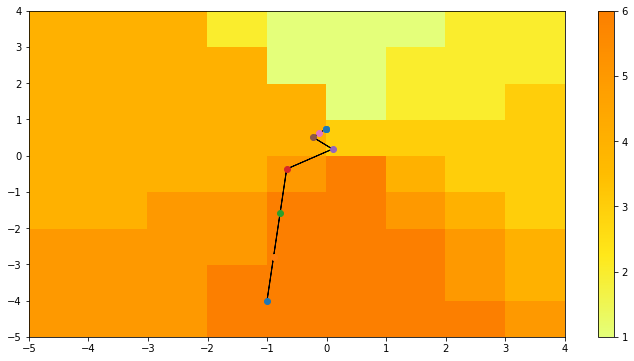

In [26]:
plt.figure(figsize=(12,6))
plt.pcolormesh(test_beta_1, test_beta_2, losses, cmap = 'Wistia')
for i, bt in enumerate(descending_betas):
    if i > 0:
        plt.arrow(*last_bt, bt[0] - last_bt[0], bt[1] - last_bt[1])
    plt.plot(*bt, 'o')
    last_bt = bt
plt.colorbar()

## Gradient Descent 

- compute the best direction along which we should change our $\beta$ vector that is mathematically guaranteed to be the direction of the steepest descent
- the gradient is a vector of derivatives for each dimension in the input space
- for a linear function the gradient is a vector of the weights associated with each input

# Problem
We can't take the derivative of our current **score fn**.  
$$   f({x}_i, {\beta}, b) = \left\{
     \begin{array}{lr}
       1 & : {\beta}\cdot{x}_i \geq b\\
       0 & : {\beta}\cdot{x}_i < b
     \end{array}
   \right.
$$  

Let's modify our score fn.  
\begin{align}
f({x}_i, {\beta}, b) &= \text{sigmoid}(x_i, \beta, b)\\
&= \frac{1}{1+e^{-(\beta\cdot x + b)}}\\
&= \sigma(x) \tag{reduced form}
\end{align}  

This is differentiable and is it turns out has a nice derivative

$$\frac{d}{dx}\sigma(x) = \sigma(x)(1-\sigma(x))$$